## 1.Import Required Dependencies

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## 2. Make the Detections

In [3]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## 3. Determine the Limbs and Joints

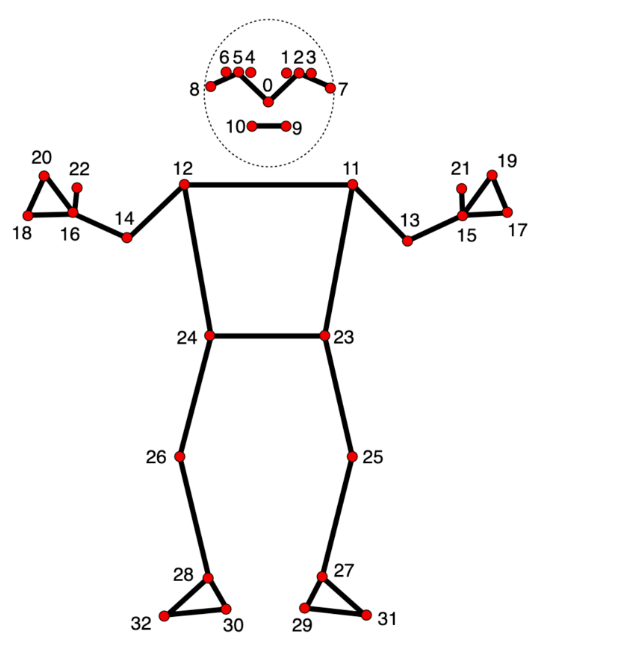

Will be using these landmarks: 

11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist


In [4]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.4450598359107971
y: 0.6201552152633667
z: -0.9175671339035034
visibility: 0.9996451139450073
, x: 0.48317915201187134
y: 0.5645284652709961
z: -0.8721210360527039
visibility: 0.9990198612213135
, x: 0.5042170882225037
y: 0.5644092559814453
z: -0.8718384504318237
visibility: 0.999226450920105
, x: 0.5236821174621582
y: 0.5654478073120117
z: -0.8719446063041687
visibility: 0.9989047050476074
, x: 0.42211318016052246
y: 0.5700362920761108
z: -0.86952143907547
visibility: 0.9991311430931091
, x: 0.4039364457130432
y: 0.573144793510437
z: -0.8685570955276489
visibility: 0.9993489384651184
, x: 0.3881685137748718
y: 0.5770843029022217
z: -0.8689081072807312
visibility: 0.9992033839225769
, x: 0.5694717764854431
y: 0.6101850867271423
z: -0.5089681148529053
visibility: 0.9989573955535889
, x: 0.3813418745994568
y: 0.6113955974578857
z: -0.48381680250167847
visibility: 0.9995824694633484
, x: 0.49545755982398987
y: 0.7025161981582642
z: -0.7762116193771362
visibility: 0.9994794726371765
,

In [5]:
len(landmarks)

33

In [6]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [7]:
landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].visibility

0.000434833113104105

In [8]:
landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].visibility

0.9782894849777222

In [9]:
landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]

x: 0.11239226162433624
y: 1.4658243656158447
z: -1.2219798564910889
visibility: 0.29151099920272827

In [10]:
landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

x: 0.15824894607067108
y: 1.793407917022705
z: -1.4920604228973389
visibility: 0.0672382041811943

## 4. Calculate Joint Angles

In [22]:
def calculate_angle(a,b,c):
    a = np.array(a) # First point
    b = np.array(b) # Mid point
    c = np.array(c) # End point
    
    #subtract y and x values from mid and end point minus y and x values from first to mid point  
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi) #convert radian to degree
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [23]:
#For ELbow
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

In [24]:
shoulder, elbow, wrist

([0.421156644821167, 0.9438469409942627],
 [0.2206968516111374, 1.5779293775558472],
 [0.30670368671417236, 2.057896614074707])

In [25]:
calculate_angle(shoulder, elbow, wrist)

152.29690268586765

In [26]:
#For Shoulder
hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            

In [27]:
hip, shoulder, elbow

([0.4715246260166168, 2.0904080867767334],
 [0.421156644821167, 0.9438469409942627],
 [0.2206968516111374, 1.5779293775558472])

In [28]:
calculate_angle(hip, shoulder, elbow)

20.05927273281641

In [29]:
#help with detemrining the positioning
#640, 480 stands for dimensions of the webcam
tuple(np.multiply(elbow, [640, 480]).astype(int))

(141, 757)

In [30]:
#help with detemrining the positioning
tuple(np.multiply(shoulder, [640, 480]).astype(int))

(269, 453)

In [32]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates to calculate angle at desired joint
            #For ELbow
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            #For Shoulder
            hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle at the elbow
            elbow_angle = calculate_angle(shoulder, elbow, wrist)
            elbow_position = tuple(np.multiply(elbow, [640, 480]).astype(int))
            cv2.putText(image, str(elbow_angle), 
                        elbow_position, 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            # Calculate angle at the shoulder
            shoulder_angle = calculate_angle(hip, shoulder, elbow)
            shoulder_position = tuple(np.multiply(shoulder, [640, 480]).astype(int))
            cv2.putText(image, str(shoulder_angle), 
                        shoulder_position, 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

                       
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.546215295791626
y: 0.6535974144935608
z: -1.5102393627166748
visibility: 0.9990633130073547
, x: 0.5860772728919983
y: 0.5806549787521362
z: -1.4396238327026367
visibility: 0.9987496137619019
, x: 0.6056837439537048
y: 0.5788698196411133
z: -1.4401865005493164
visibility: 0.99856036901474
, x: 0.6216309070587158
y: 0.5782427191734314
z: -1.4403765201568604
visibility: 0.998449444770813
, x: 0.5220704078674316
y: 0.5852594375610352
z: -1.447214961051941
visibility: 0.9990113973617554
, x: 0.5018092393875122
y: 0.5855661034584045
z: -1.4472512006759644
visibility: 0.999006450176239
, x: 0.4857579171657562
y: 0.5856295824050903
z: -1.4479016065597534
visibility: 0.9992221593856812
, x: 0.6564813852310181
y: 0.6013790369033813
z: -0.9141513705253601
visibility: 0.9984130859375
, x: 0.47909536957740784
y: 0.6047990322113037
z: -0.9329594373703003
visibility: 0.9994381070137024
, x: 0.5904229879379272
y: 0.7143526077270508
z: -1.300599217414856
visibility: 0.9990001320838928
, x: 0.514